# Temperetura atmosf√©rica na Regi√£o Integrada de Desenvolvimento do

Distrito Federal e Entorno

Estava quente na RIDE no dia do meu aniver√°rio no primeiro ano da pandemia?

Carolina Musso [](https://orcid.org/0000-0002-8107-6458) (Universidade de Bras√≠lia)  
17 de julho de 2025

Em 22 de outubro de 2020, data pessoalmente significativa para a autora, foram extra√≠dos dados de temperatura da superf√≠cie terrestre (LST) para a Regi√£o Integrada de Desenvolvimento do Distrito Federal e Entorno (RIDE-DF), com base em imagens do sat√©lite MODIS. Os dados foram filtrados para incluir apenas os munic√≠pios pertencentes √† RIDE. Em seguida, avaliou-se o ajuste de diferentes modelos de variogramas aos dados, optando-se por um modelo Exponencial. Ent√£o, aplicou-se a krigagem ordin√°ria para interpolar uma superf√≠cie cont√≠nua de temperatura e comparou-se com a krigagem universal, que foram considerados equivalentes. A superf√≠cie resultante oferece uma vis√£o da estrutura espacial da varia√ß√£o de temperatura na regi√£o durante um dia especialmente quente (para mim) e memor√°vel de 2020. e n√£o apenas uma mera curiosidade geogr√°fica, mas tamb√©m um exerc√≠cio de aplica√ß√£o de t√©cnicas geoestat√≠sticas em um contexto pessoal e afetivo.

## Introdu√ß√£o

H√° quem n√£o goste de comemorar anivers√°rios. N√£o √© o meu caso. Gosto tanto que, quando um anivers√°rio termina, j√° come√ßo a planejar o do ano seguinte. Por isso, lembro com nitidez do ano em que a comemora√ß√£o n√£o aconteceu: 2020, o primeiro ano da pandemia de COVID-19. Claro, entre as muitas consequ√™ncias daquele ano dif√≠cil, a aus√™ncia de uma festa de anivers√°rio pessoal est√° longe de ser a mais relevante, mas n√£o deixa de ser memor√°vel, ao menos para mim.

Al√©m da aus√™ncia de bolo e parab√©ns, 2020 foi, curiosamente, um dos anos em que mais trabalhei. Estive envolvida com a Secretaria de Sa√∫de, com o Minist√©rio da Sa√∫de e com a Faculdade de Ci√™ncias da Sa√∫de da UnB. Em meio a plant√µes, pesquisas, boletins epidemiol√≥gicos e videochamadas sem fim, conheci algo que nunca tinha ouvido falar antes: a RIDE.

A RIDE (Regi√£o Integrada de Desenvolvimento do Distrito Federal e Entorno, @fig-mapa-ride) √© uma unidade regional composta pelo Distrito Federal e diversos munic√≠pios lim√≠trofes dos estados de Goi√°s e Minas Gerais. Seu objetivo √© promover o planejamento e a execu√ß√£o integrada de pol√≠ticas p√∫blicas, especialmente em √°reas como transporte, sa√∫de, educa√ß√£o e infraestrutura, de modo a articular o desenvolvimento socioecon√¥mico da capital federal com o de seu entorno imediato. O DF, por sua posi√ß√£o central e por concentrar muitos servi√ßos p√∫blicos, presta servi√ßos √† regi√£o em m√∫ltiplas frentes, como sa√∫de, empregos e educa√ß√£o.

A aus√™ncia de uma festa e o calor escaldante de um apartamento sem ar-condicionado, com as janelas vedadas por conta de uma reforma de fachada, deixaram uma impress√£o permanente na mem√≥ria. Assim, RIDE, anivers√°rio e temperatura se entrela√ßam para compor este trabalho.

O objetivo deste relat√≥rio √© aplicar t√©cnicas de geoestat√≠stica, em especial a krigagem, para estimar a superf√≠cie de temperatura do dia 22 de outubro de 2020, data do meu anivers√°rio, em toda a extens√£o da RIDE. A krigagem √© um m√©todo de interpola√ß√£o espacial que utiliza modelos variogr√°ficos para estimar valores em locais n√£o amostrados, levando em considera√ß√£o a autocorrela√ß√£o espacial dos dados. Trata-se, portanto, de uma ferramenta poderosa para reconstruir superf√≠cies cont√≠nuas a partir de dados pontuais, como √© o caso das observa√ß√µes de temperatura registradas por sensores ou sat√©lites.

Mais do que um pretexto pessoal, este trabalho busca ilustrar o potencial da geoestat√≠stica na compreens√£o de padr√µes espaciais de vari√°veis ambientais, mesmo (ou especialmente) em datas de valor afetivo.

In [ ]:
rm(list=ls())
if(!require("pacman")) install.packages("pacman")

Loading required package: pacman

In [ ]:
## ler os shapefiles com pacote sp
ride_sf <- sf::read_sf("RIDE/.")
ride_sf_centroids <- st_centroid(ride_sf)

increasing max.overlaps

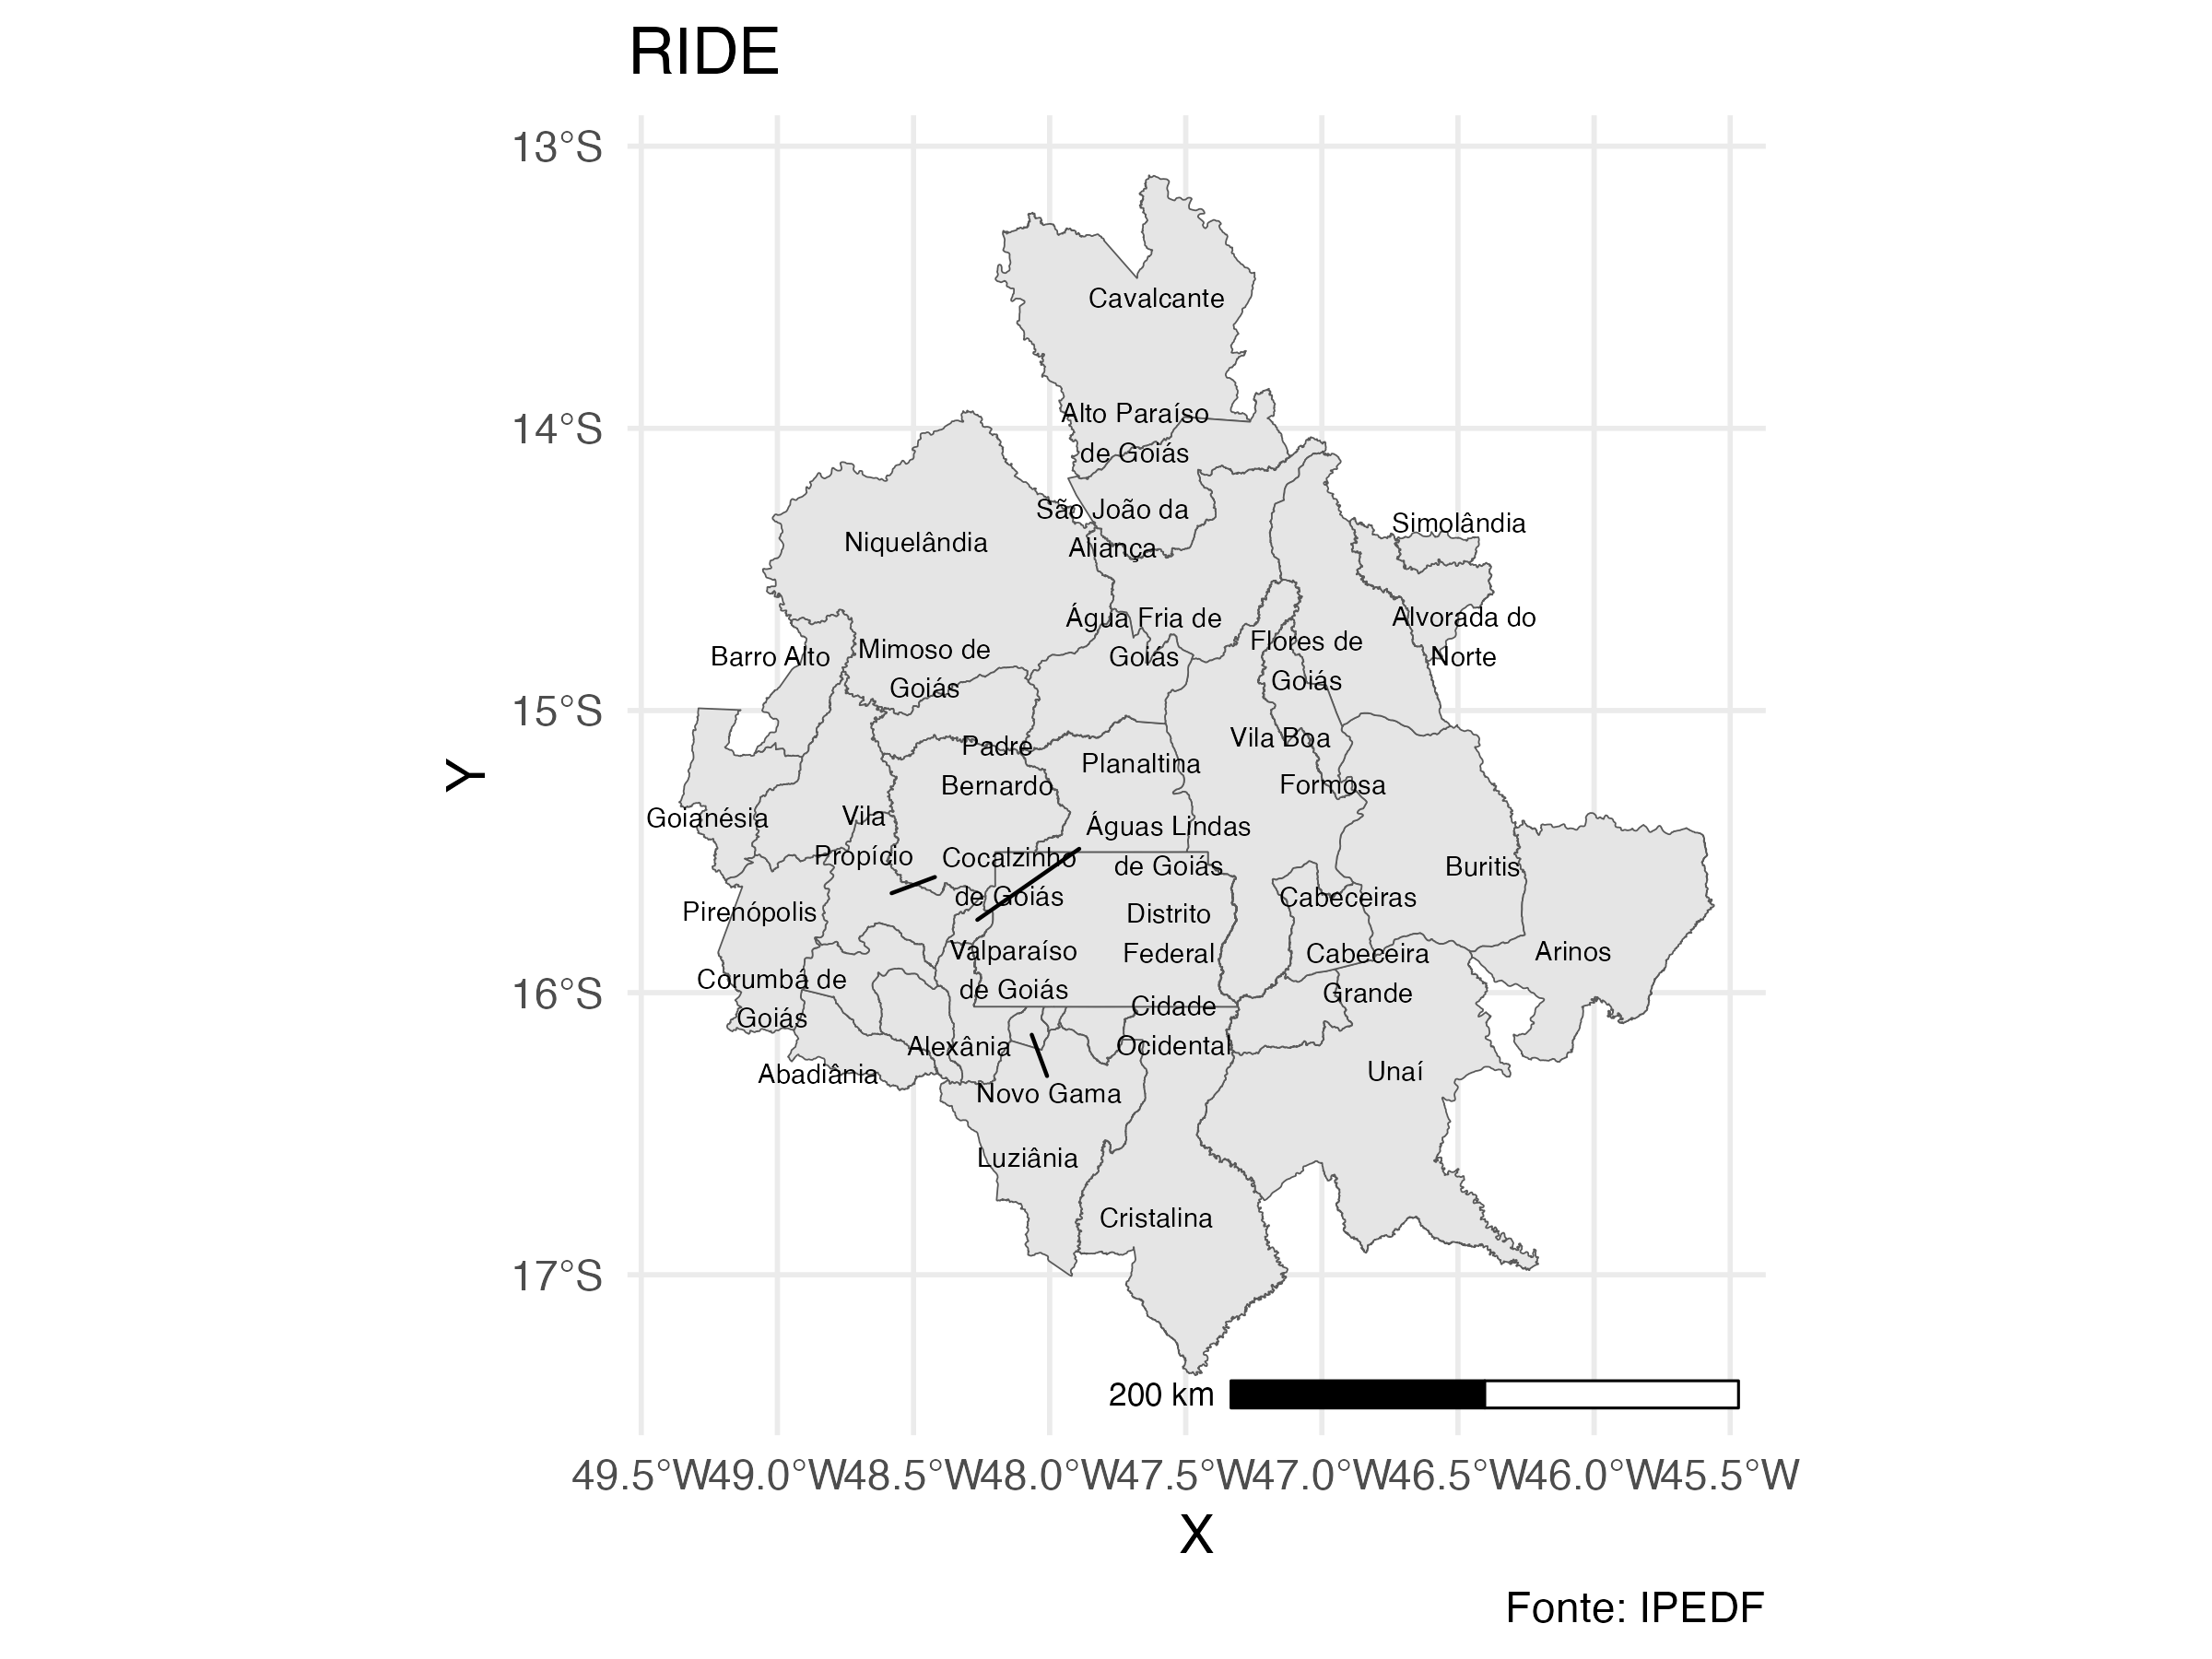

In [ ]:
knitr::include_graphics("ride.png")

In [ ]:
# username <- ""
# password <- ""
# mf_login(credentials = c(username, password))
# 
# 
# roi <- st_as_sf(
#   data.frame(id = "ride_df",
#              geom =  "POLYGON ((-49.36 -17.36, -49.36 -13.10, -45.56 -13.10, -45.56 -17.36, -49.36 -17.36))"),
#   wkt = "geom", crs = 4326
# )
# 
# 
# collection <- "MOD11A1.061" #10:30
# variables <- c("LST_Day_1km")
# time_range <- as.Date(c("2020-10-22", "2020-10-22"))
# 
# urls <- mf_get_url(collection = collection, variables = variables,
#                    roi = roi, time_range = time_range)

In [ ]:
# res <-  mf_download_data(urls)
# 
# 
# rast <- mf_import_data(
#   path = unique(dirname(res$destfile))[1],
#   collection = collection,
#   proj_epsg = 4326)
# 
# df <- as.data.frame(rast, xy = TRUE)
# df$lst_c <- df$LST_Day_1km - 273.15
# 
# # 7) Exportar como CSV
# write.csv(df[, c("x","y","lst_c")], "temperatura_geral.csv", row.names = FALSE)
# 

## Material e M√©todos

Para a obten√ß√£o dos dados de temperatura utilizados neste trabalho, recorreu-se √† plataforma Earthdata, mantida pela NASA em parceria com o Servi√ßo Geol√≥gico dos Estados Uniddos (USGS), que disponibiliza produtos de sensoriamento remoto derivados do sensor MODIS (Moderate Resolution Imaging Spectroradiometer), a bordo dos sat√©lites Terra e Aqua \[@wan2002modis; @earthdata\].

Foi utilizada uma cole√ß√£o di√°ria de temperatura da superf√≠cie terrestre (Land Surface Temperature ‚Äì LST), registrada no per√≠odo diurno, aproximadamente √†s 10h30 no hor√°rio local, com resolu√ß√£o espacial de 1 km¬≤. Essa vari√°vel representa a temperatura radiativa da superf√≠cie da Terra, estimada a partir da emiss√£o t√©rmica captada pelos sensores MODIS. Os dados s√£o originalmente fornecidos em kelvin e foram convertidos para graus Celsius para facilitar a an√°lise e a interpreta√ß√£o. A data selecionada foi 22 de outubro de 2020, coincidindo com o anivers√°rio da autora e escolhida como eixo tem√°tico do estudo.

A √°rea de interesse corresponde √† Regi√£o Integrada de Desenvolvimento do Distrito Federal e Entorno (RIDE-DF), composta pelo Distrito Federal por 34 munic√≠pios de seu entorno, sendo 30 localizados no estado de Goi√°s e 4 em Minas Gerais, conforme estabelecido pela legisla√ß√£o federal vigente. Para delimitar essa regi√£o, foi utilizado um pol√≠gono geogr√°fico de refer√™ncia com abrang√™ncia compat√≠vel com os limites da RIDE. Os dados de temperatura foram ent√£o recortados com base nesse pol√≠gono, de forma a manter apenas os pontos efetivamente situados dentro da √°rea de estudo.

In [ ]:
df <- read_csv("temperatura_geral.csv")

Rows: 110038 Columns: 3
‚îÄ‚îÄ Column specification ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Delimiter: ","
dbl (3): x, y, lst_c

‚Ñπ Use `spec()` to retrieve the full column specification for this data.
‚Ñπ Specify the column types or set `show_col_types = FALSE` to quiet this message.

No total, foram utilizados 181 medi√ß√µes . As coordenadas dos pontos de temperatura foram obtidas tanto em formato geogr√°fico (latitude e longitude) quanto em sistema projetado UTM (Universal Transverse Mercator, zona 23S, SIRGAS 2000), sendo este √∫ltimo utilizado nas an√°lises geoestat√≠sticas por ser mais adequado ao c√°lculo de dist√¢ncias em metros.

In [ ]:
g2 <- ggplot() +
  geom_sf(data = ride_sf, fill = NA, color = "black", linewidth = 0.1) +  # pol√≠gono em preto
  geom_sf(data = dados_utm_sf_amostra, aes(color = temp), size = 2) +  # pontos coloridos
  #acrescentar rotulos com nome dos municipios
  
  scale_color_viridis_c(name = "Temperatura (¬∞C)") +
  theme_minimal(base_size=12) +
  labs(
    title = "Pontos de medi√ß√£o\n Temperatura na RIDE-DF",
    caption = "Fonte: Earthdata, NASA"
  )
ggsave("ride_temp_points.png", g2, width = 8, height = 6, dpi = 300)

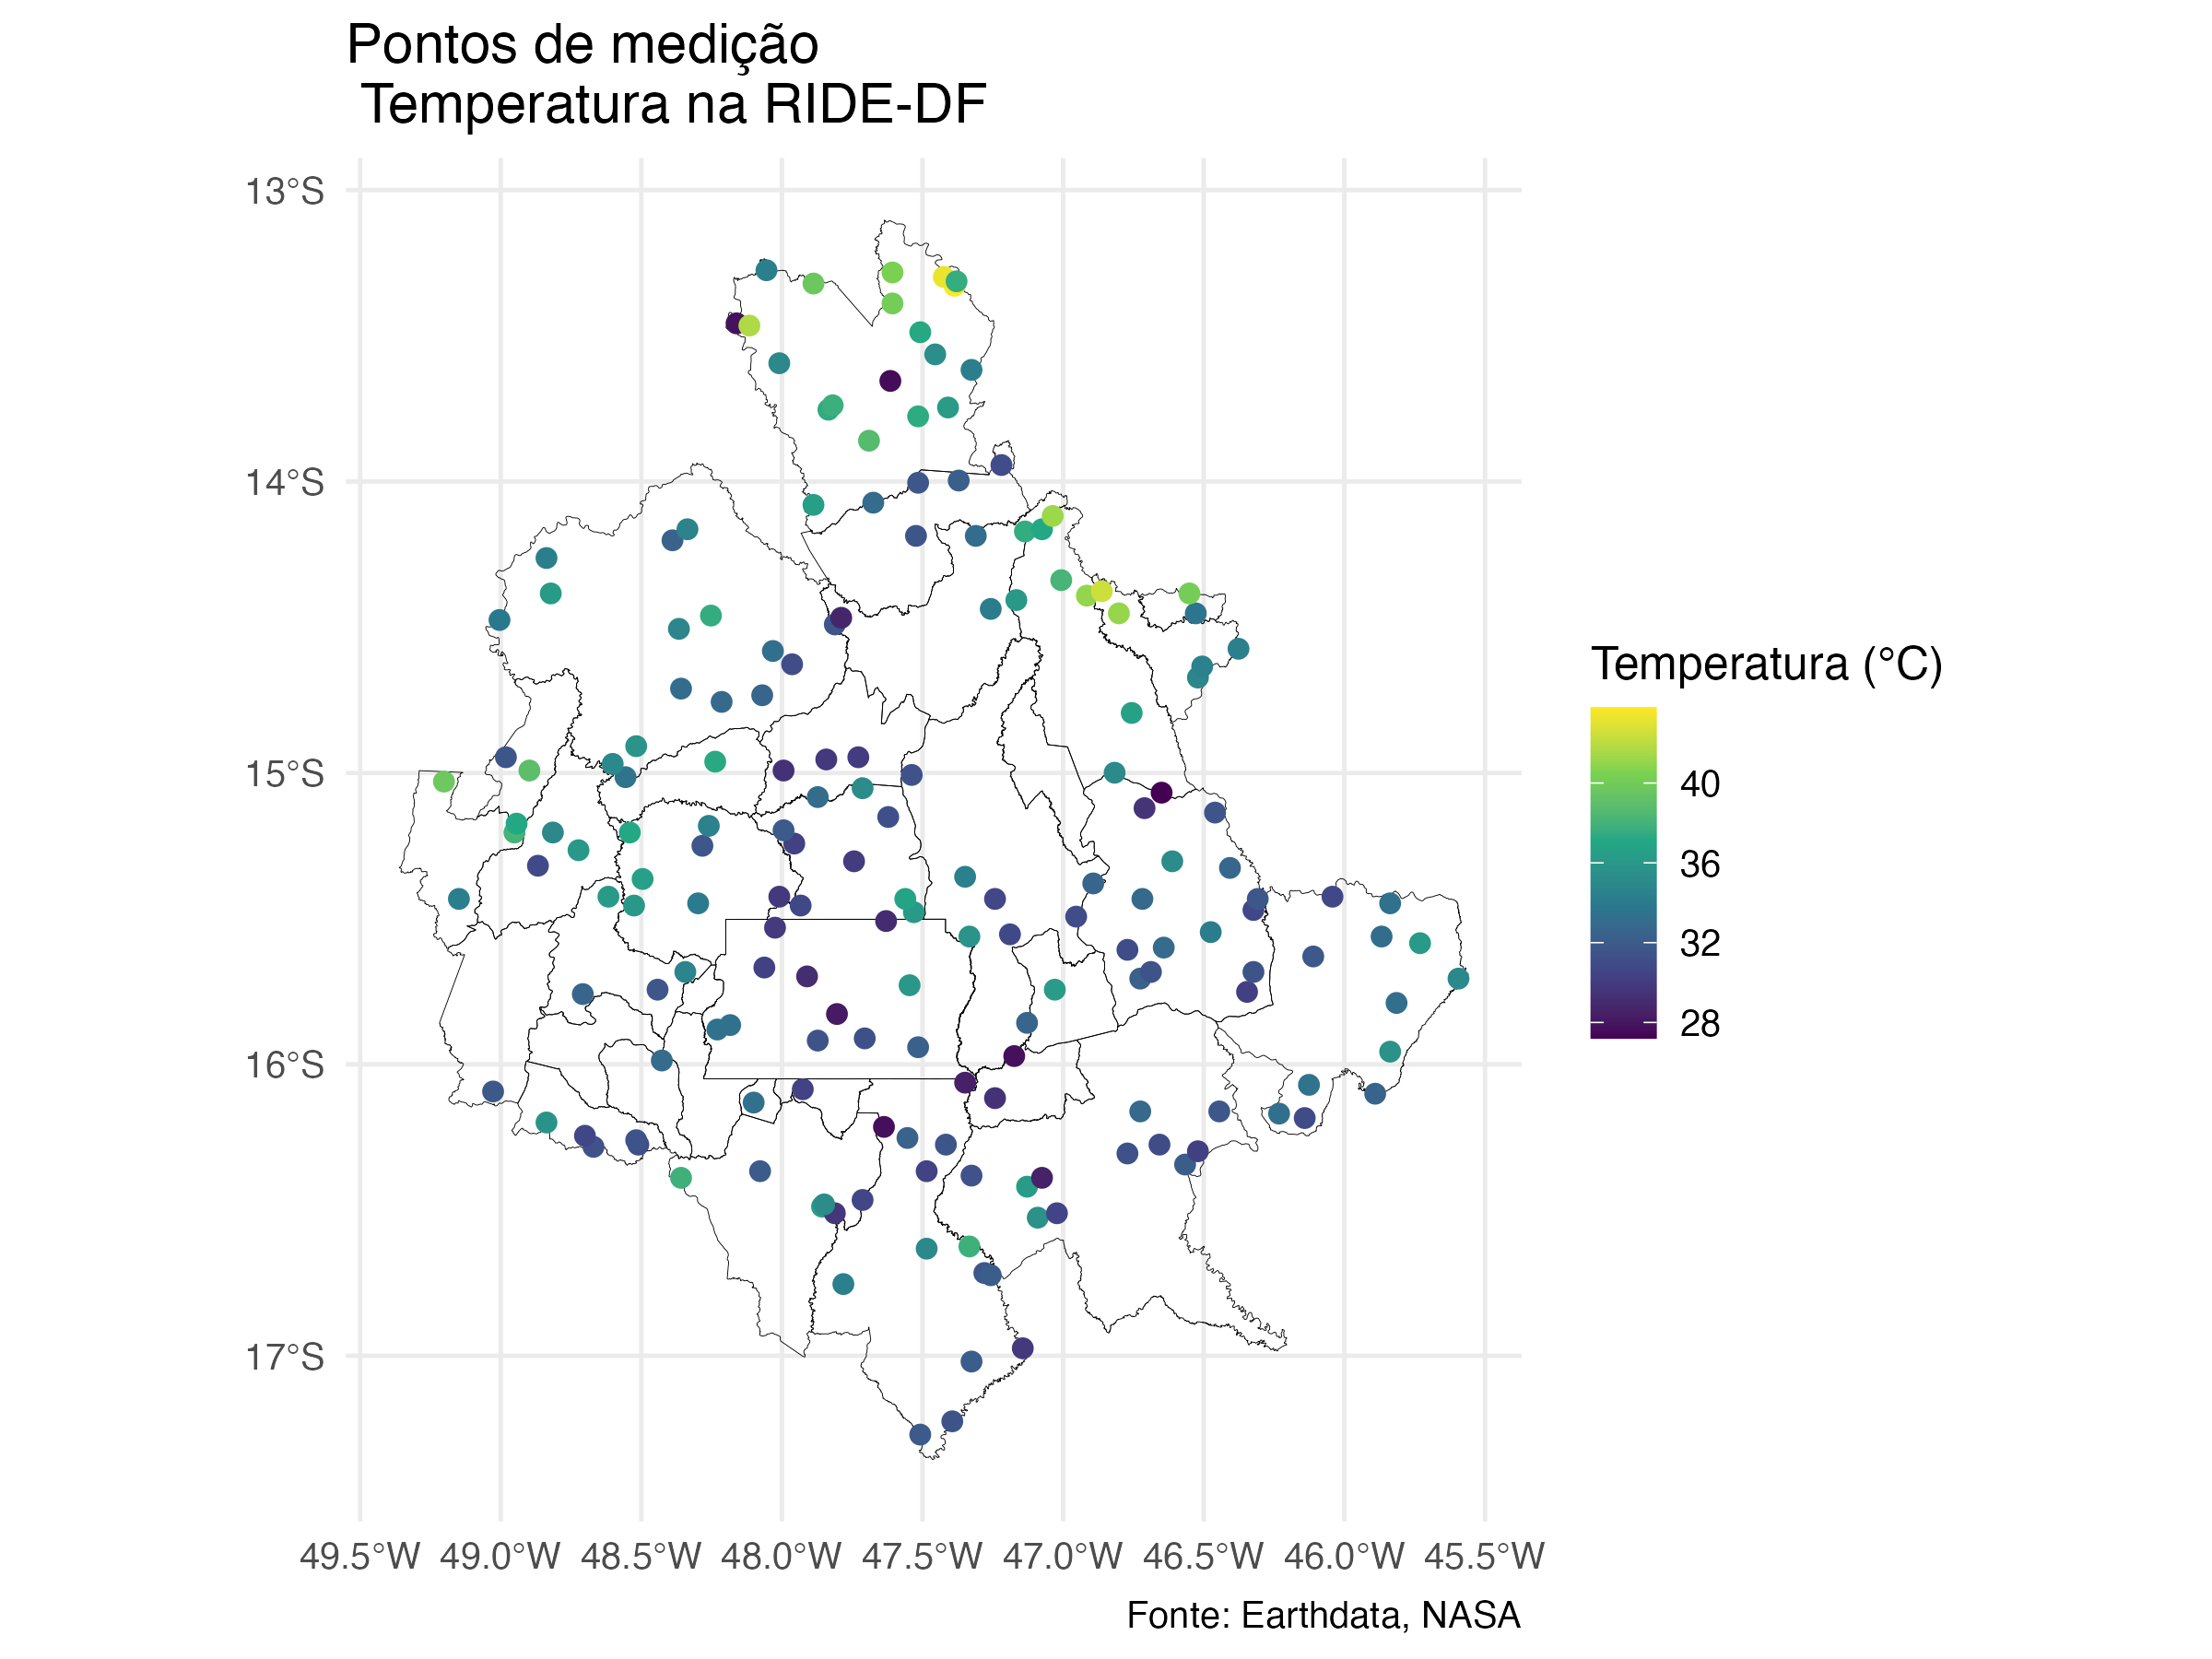

In [ ]:
knitr::include_graphics("ride_temp_points.png")

Com os dados preparados, procedeu-se √† aplica√ß√£o da krigagem ordin√°ria, t√©cnica de interpola√ß√£o espacial baseada na teoria dos processos estoc√°sticos estacion√°rios, que utiliza a estrutura de autocorrela√ß√£o espacial da vari√°vel observada para gerar estimativas em pontos n√£o amostrados.

## Resultados

A fim de estimar a temperatura da superf√≠cie terrestre em locais n√£o amostrados dentro da RIDE-DF, foi realizada a modelagem do variograma emp√≠rico com base na amostra dos 181 pontos. Para isso, foram testados diferentes modelos te√≥ricos de variograma, esf√©rico, gaussiano, exponencial e linear, com diferentes valores de sill, range e nugget com o objetivo de avaliar qual estrutura de depend√™ncia espacial melhor se ajustava aos dados.

A compara√ß√£o visual dos ajustes ( @fig-ajuste-variogramas) mostrou que os modelos esf√©rico e exponencial foram capazes de capturar razoavelmente bem a tend√™ncia observada no variograma emp√≠rico. O modelo gaussiano n√£o se ajustou bem quando os dados atingiam o range e o modelo linear apresentou instabilidades no processo de ajuste, com alerta de singularidade, e foi descartado da an√°lise final. O gr√°fico resultante mostra a semivari√¢ncia m√©dia dos pares de pontos em fun√ß√£o da dist√¢ncia que os separa, evidenciando o grau de depend√™ncia espacial da vari√°vel.

O modelo exponencial foi selecionado para as an√°lises de krigagem, por apresentar o melhor compromisso entre ader√™ncia visual ao variograma emp√≠rico, simplicidade de interpreta√ß√£o e estabilidade num√©rica no ajuste. Conforme discutido por Moraga (2022), esse modelo √© especialmente √∫til quando a correla√ß√£o espacial decresce suavemente com a dist√¢ncia, o que foi observado nos dados analisados.

Com o modelo exponencial ajustado, foi realizada a krigagem ordin√°ria sobre uma grade regular de pontos com espa√ßamento de 1 km dentro da √°rea da RIDE. O resultado foi a gera√ß√£o de uma superf√≠cie cont√≠nua de temperatura estimada, representando a varia√ß√£o espacial da LST em toda a regi√£o no dia 22 de outubro de 2020.

In [ ]:
# 1. Calcula variograma
v <- variogram(temp ~ 1, data = dados_utm_sf_amostra)
v$dist <- v$dist / 1000  # converte para km

# 2. Ajusta modelos
fit_sph <- fit.variogram(v, model = vgm(psill = 15, model = "Sph", range = 200, nugget = 3))
fit_gau <- fit.variogram(v, model = vgm(psill = 15, model = "Gau", range = 200, nugget = 3))
fit_exp <- fit.variogram(v, model = vgm(psill = 10, model = "Exp", range = 200, nugget = 2))
fit_lin <- fit.variogram(v, model = vgm(psill = 15, model = "Lin", range = 200, nugget = 3))

Warning in fit.variogram(v, model = vgm(psill = 15, model = "Lin", range = 200,
: singular model in variogram fit

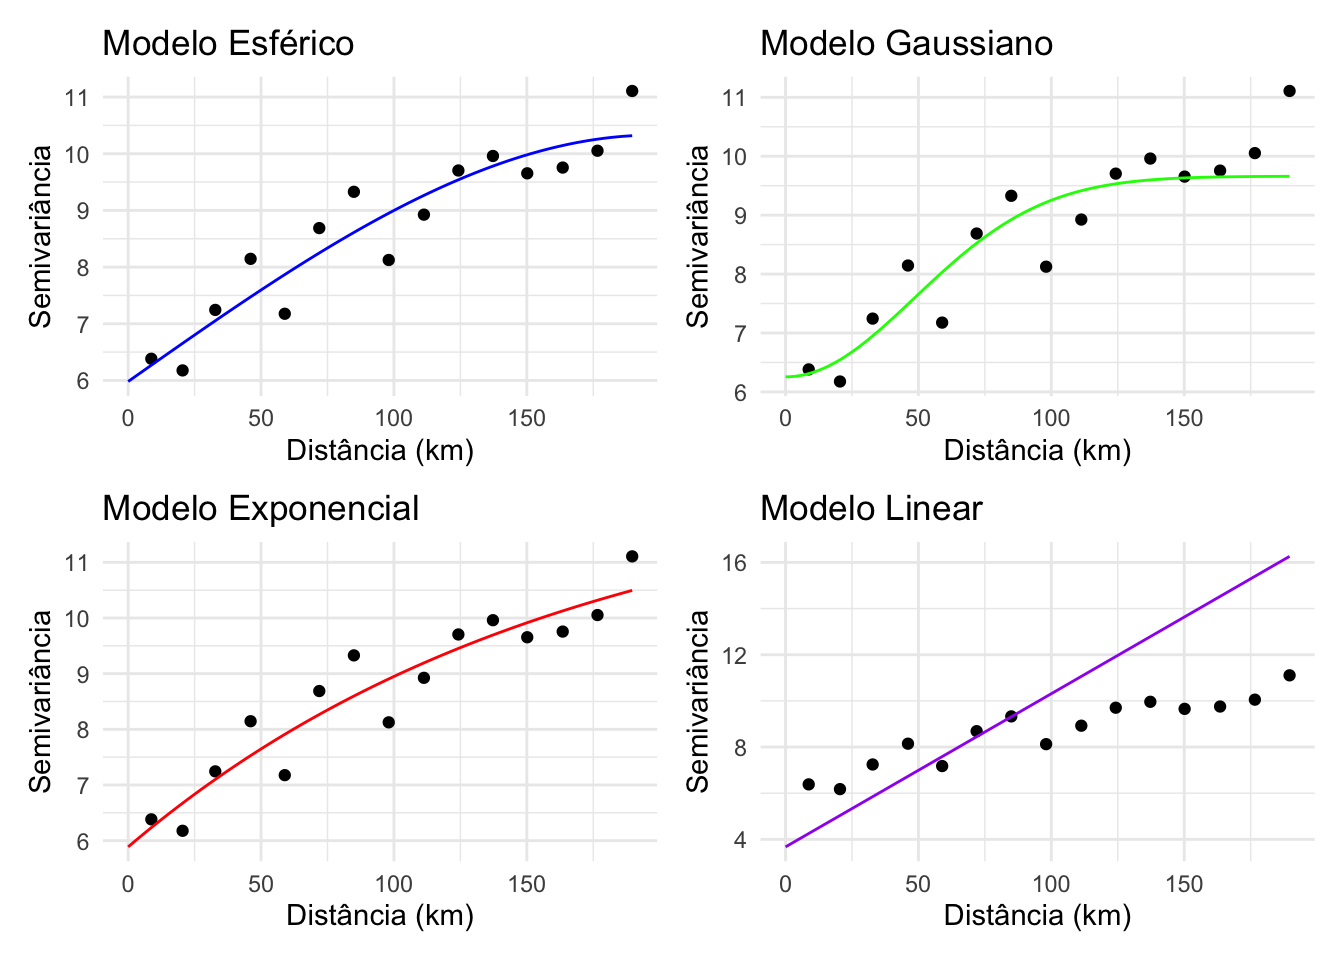

In [ ]:
# 4. Patchwork: 2x2
(g1 | g2) / (g3 | g4)

Na sequ√™ncia, foi ajustado um modelo te√≥rico exponencial, com par√¢metros iniciais definidos para o patamar (sill), efeito pepita (nugget) e alcance (range). O ajuste obteve converg√™ncia e mostrou boa ader√™ncia visual ao variograma emp√≠rico, respeitando a tend√™ncia de crescimento r√°pido da semivari√¢ncia para pequenas dist√¢ncias, caracter√≠stica compat√≠vel com esse tipo de modelo.

O modelo ajustado estimou um nugget de aproximadamente 3, indicando uma parcela de variabilidade que n√£o √© explicada pela estrutura espacial, possivelmente atribu√≠da a erros de medi√ß√£o, microvaria√ß√µes locais ou ru√≠do do processo. O sill (patamar da vari√¢ncia total) foi estimado em torno de 15, valor que representa o n√≠vel de estabiliza√ß√£o da semivari√¢ncia para dist√¢ncias maiores. J√° o range foi estimado em cerca de 150 km, sugerindo que pontos distantes at√© essa ordem de magnitude ainda apresentam correla√ß√£o espacial significativa.

Esses valores s√£o consistentes com um cen√°rio em que a temperatura de superf√≠cie apresenta autocorrela√ß√£o espacial de m√©dia escala, com varia√ß√£o gradual ao longo do territ√≥rio da RIDE, o que justifica o uso da krigagem como interpolador.

In [ ]:
# Criar grade regular mais esparsa (5 km em vez de 1 km)
vc <- variogram(temp ~ 1, dados_utm_sf_amostra)
vinitial <- vgm(psill = 15, model = "Exp", range = 150000, nugget = 3)
fv <- fit.variogram(vc, model = vinitial)
ride_utm <- st_transform(ride_sf, 31983)

# üî≥ Criar grade regular de pontos dentro da RIDE
grid <- st_make_grid(ride_utm, cellsize = 1000, what = "centers")
grid_sf <- st_sf(geometry = grid, crs = st_crs(ride_utm))
grid_sf <- grid_sf[ride_utm, ]

# ü§ñ Krigagem
k <- gstat(formula = temp ~ 1, data = dados_utm_sf_amostra, model = fv)
kpred <- predict(k, newdata = grid_sf)

[using ordinary kriging]

Para a aplica√ß√£o da krigagem, foi constru√≠da uma grade regular de predi√ß√£o sobre a √°rea da RIDE, com espa√ßamento de 2.500 metros entre os pontos centrais. Esse valor foi escolhido com o objetivo de manter boa resolu√ß√£o espacial ao mesmo tempo em que se preserva a legibilidade visual da trama da grade. Os pontos da grade foram filtrados para incluir apenas aqueles contidos dentro dos limites geogr√°ficos da regi√£o de estudo.

A @fig-grade-krigagem apresenta os pontos da grade de predi√ß√£o (em vermelho) distribu√≠dos de forma homog√™nea ao longo da RIDE, al√©m dos pontos amostrados utilizados para o ajuste da krigagem. Estes pontos amostrados est√£o representados por marcadores pretos, acompanhados dos respectivos valores de temperatura da superf√≠cie terrestre (em graus Celsius).

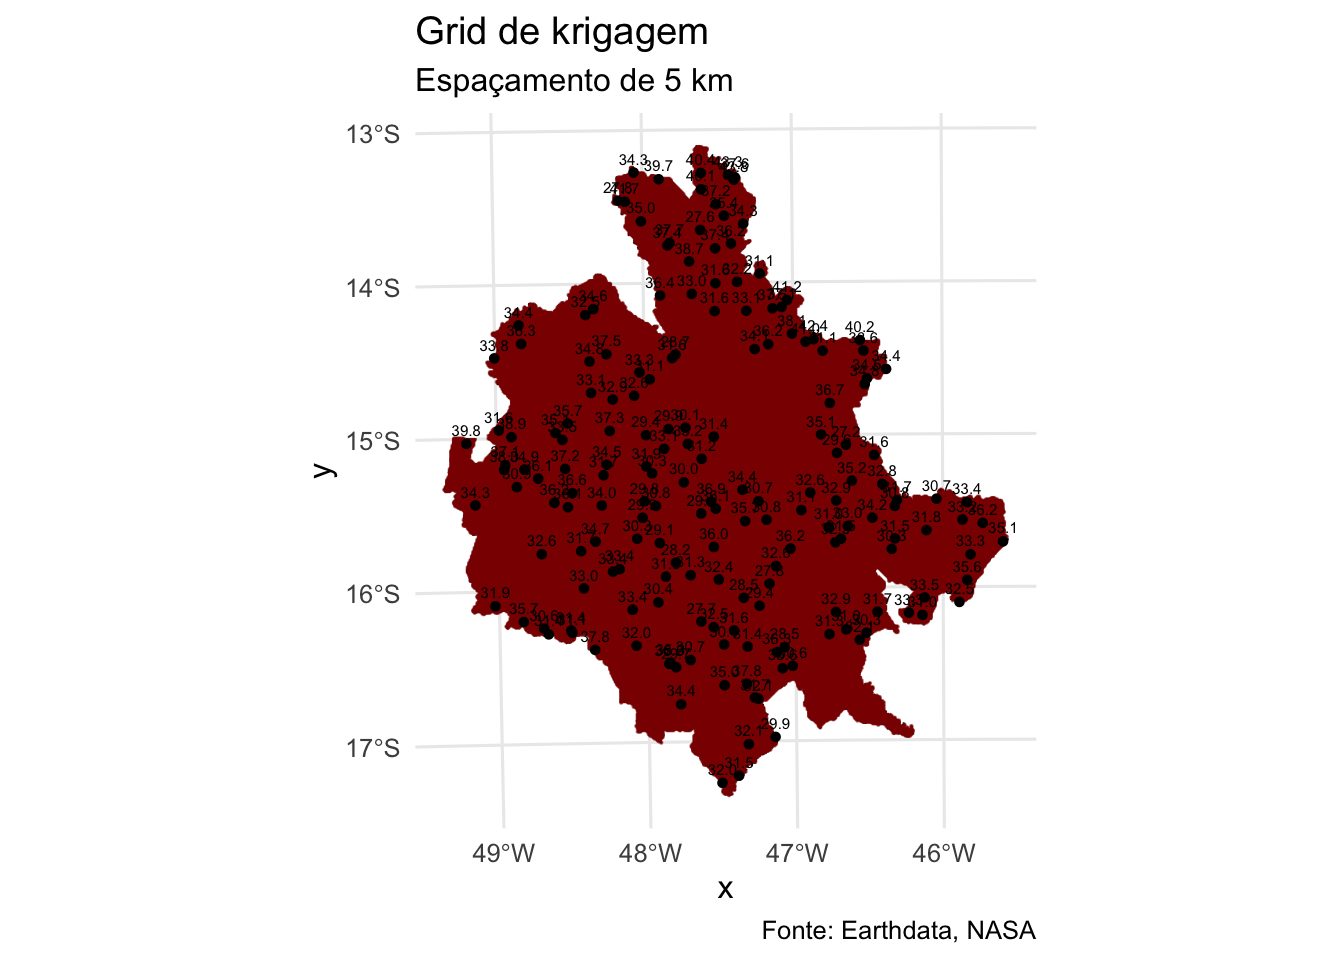

In [ ]:
dados_lab <- dados_utm_sf_amostra %>%
  mutate(temp_label = sprintf("%.1f", temp))
# Gr√°fico
ggplot() +
  geom_sf(data = ride_utm, fill = NA, color = "black") +  # contorno da RIDE
  geom_sf(data = grid_sf, color = "darkred", size = 0.1, alpha = 0.6) +  # pontos do grid
  geom_sf(data = dados_lab, size = 1.2, shape = 21, fill = "black") +  # pontos amostrados pretos
  geom_sf_text(data = dados_lab, aes(label = temp_label), size = 2, nudge_y = 10000) +  # temperatura como texto
  theme_minimal(base_size=12) +
  labs(
    title = "Grid de krigagem ",
    subtitle = "Espa√ßamento de 5 km",
    caption = "Fonte: Earthdata, NASA"
  )

In [ ]:
dados_utm_sf_amostra <- dados_utm_sf_amostra %>%
  mutate(
    x = st_coordinates(geometry)[,1],
    y = st_coordinates(geometry)[,2]
  )
grid_sf <- grid_sf %>%
  mutate(
    x = st_coordinates(geometry)[,1],
    y = st_coordinates(geometry)[,2]
  )
# Krigagem com tend√™ncia espacial (universal)
k_uni <- gstat(
  formula = temp ~ x + y,
  data = dados_utm_sf_amostra,
  model = fv
)

# Predi√ß√£o sobre a grade
kpred_uni <- predict(k_uni, newdata = grid_sf)

[using universal kriging]

Al√©m da krigagem ordin√°ria, foi tamb√©m aplicada a krigagem universal, que considera a presen√ßa de uma tend√™ncia espacial global na m√©dia da vari√°vel de interesse. Nesse caso, admitiu-se que a temperatura da superf√≠cie terrestre poderia variar de forma sistem√°tica ao longo do espa√ßo, e essa tend√™ncia foi modelada por meio das pr√≥prias coordenadas UTM (x e y) dos pontos de amostragem.

O modelo ajustado incorporou essa estrutura, permitindo estimar a m√©dia da temperatura como uma fun√ß√£o linear das coordenadas espaciais, enquanto a depend√™ncia residual foi tratada pela estrutura variogr√°fica previamente ajustada.

Apesar da incorpora√ß√£o dessa estrutura adicional no modelo, a compara√ß√£o visual entre os mapas resultantes da krigagem ordin√°ria e da krigagem universal ( @fig-krigagem-comparacao) n√£o revelou diferen√ßas percept√≠veis na superf√≠cie interpolada. Ambas as abordagens produziram mapas semelhantes, com padr√µes espaciais suaves e coerentes com a distribui√ß√£o dos dados observados.

Essa aus√™ncia de distin√ß√£o visual pode ser explicada por caracter√≠sticas da pr√≥pria √°rea de estudo: a RIDE-DF est√° localizada em uma regi√£o de relevo relativamente plano e cont√≠nuo, com uma distribui√ß√£o espacial de temperatura que, ao menos na data considerada, n√£o apresenta gradientes acentuados ou tend√™ncias marcantes ao longo das coordenadas geogr√°ficas. Em contextos assim, a contribui√ß√£o de uma estrutura de tend√™ncia global tende a ser pequena, fazendo com que a krigagem universal e a ordin√°ria produzam resultados semelhantes.

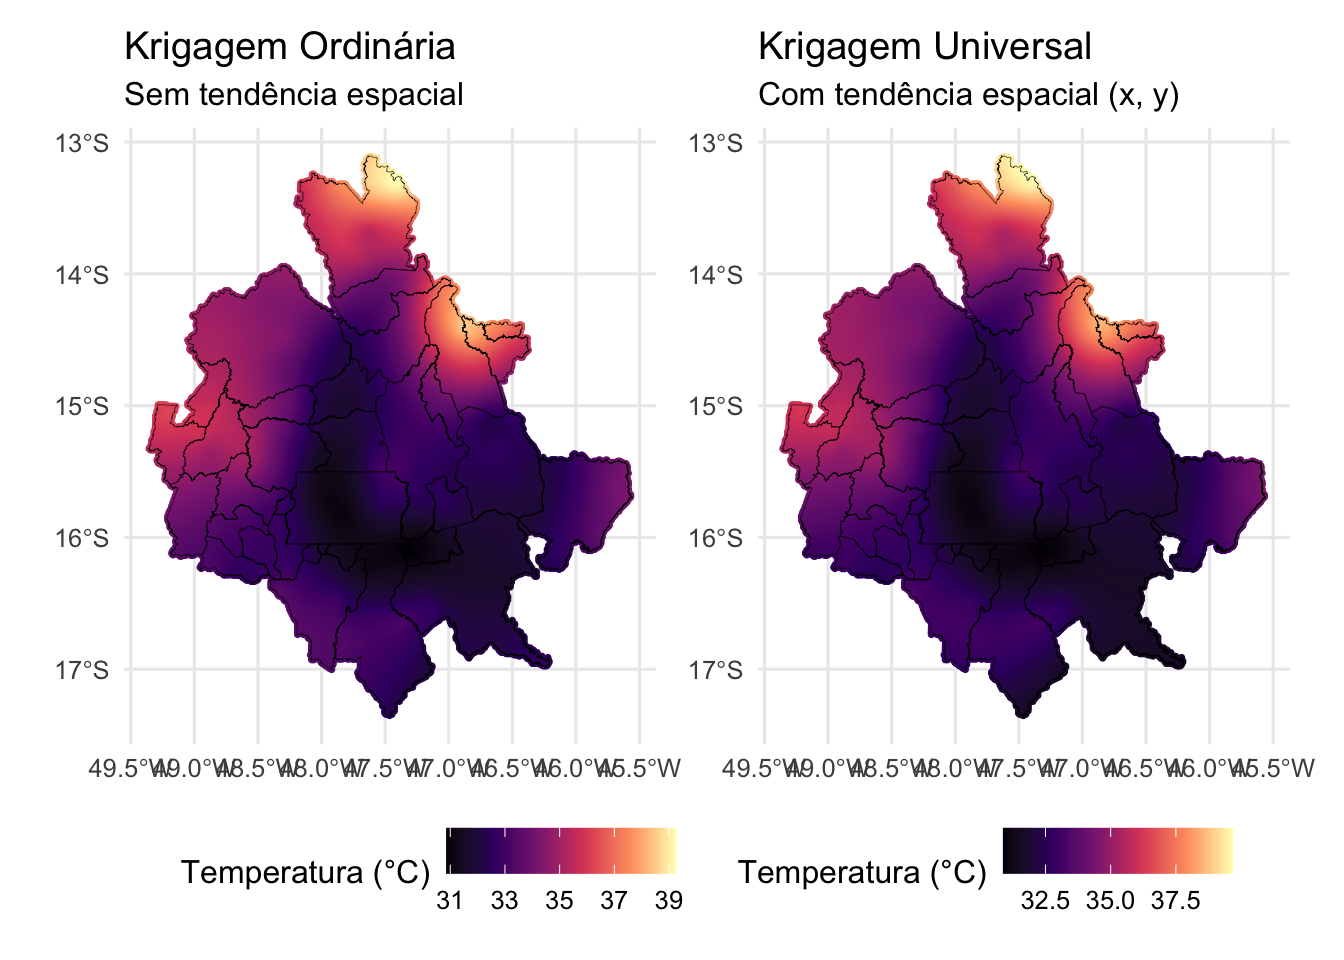

In [ ]:
# Gr√°fico da krigagem ordin√°ria
p_ordinaria <- ggplot() +
  geom_sf(data = kpred_latlon, aes(color = var1.pred), size = 0.6) +
  geom_sf(data = ride_latlon, fill = NA, color = "black", linewidth = 0.1) +
  scale_color_viridis_c(name = "Temperatura (¬∞C)", option = "magma") +
  theme_minimal(base_size=12) +
  labs(title = "Krigagem Ordin√°ria", subtitle = "Sem tend√™ncia espacial")

# Gr√°fico da krigagem universal
p_universal <- ggplot() +
  geom_sf(data = st_transform(kpred_uni_sf, 4326), aes(color = var1.pred), size = 0.6) +
  geom_sf(data = ride_latlon, fill = NA, color = "black", linewidth = 0.1) +
  scale_color_viridis_c(name = "Temperatura (¬∞C)", option = "magma") +
  theme_minimal(base_size=12) +
  labs(title = "Krigagem Universal", subtitle = "Com tend√™ncia espacial (x, y)")

# Patchwork lado a lado
p_ordinaria + p_universal + plot_layout(guides = "collect") & theme(legend.position = "bottom")

Avaliando a superficie de erros vemos que os erros sao menores perto dos posntos amostrados como esperado lalala

In [ ]:
# Adicione a coluna de vari√¢ncia aos objetos sf
kpred_latlon$method <- "Ordin√°ria"
kpred_latlon$var <- kpred$var1.var

kpred_uni_latlon <- st_transform(kpred_uni_sf, 4326)
kpred_uni_latlon$method <- "Universal"
kpred_uni_latlon$var <- kpred_uni$var1.var

# Junta ambos para facilitar o plot com facetas ou patchwork
erros_comb <- rbind(kpred_latlon, kpred_uni_latlon)

Avaliando a superf√≠cie do erro padr√£o das predi√ß√µes por krigagem (@fig-superficie-erro-padrao), observa-se que os menores valores de incerteza concentram-se nas regi√µes pr√≥ximas aos pontos de amostragem, como era esperado. Nessas √°reas, a densidade de informa√ß√£o observada permite ao modelo realizar predi√ß√µes mais confi√°veis, reduzindo a vari√¢ncia associada. Por outro lado, nas por√ß√µes mais perif√©ricas da RIDE, especialmente em trechos do norte, nordeste e extremo oeste ‚Äî, os valores do erro padr√£o se elevam, refletindo a maior dist√¢ncia em rela√ß√£o aos dados utilizados no ajuste da krigagem.

Esse comportamento √© caracter√≠stico do m√©todo geoestat√≠stico adotado, uma vez que a precis√£o da predi√ß√£o decai com o aumento da dist√¢ncia em rela√ß√£o aos pontos observados. Al√©m disso, nota-se que tanto a krigagem ordin√°ria quanto a universal apresentaram padr√µes similares de erro padr√£o, refor√ßando a conclus√£o de que a inclus√£o da tend√™ncia espacial n√£o resultou em ganhos substantivos de acur√°cia no presente contexto.

In [ ]:
# Para krigagem ordin√°ria
kpred_latlon$erro_padrao <- sqrt(kpred$var1.var)

# Para krigagem universal
kpred_uni_latlon$erro_padrao <- sqrt(kpred_uni$var1.var)

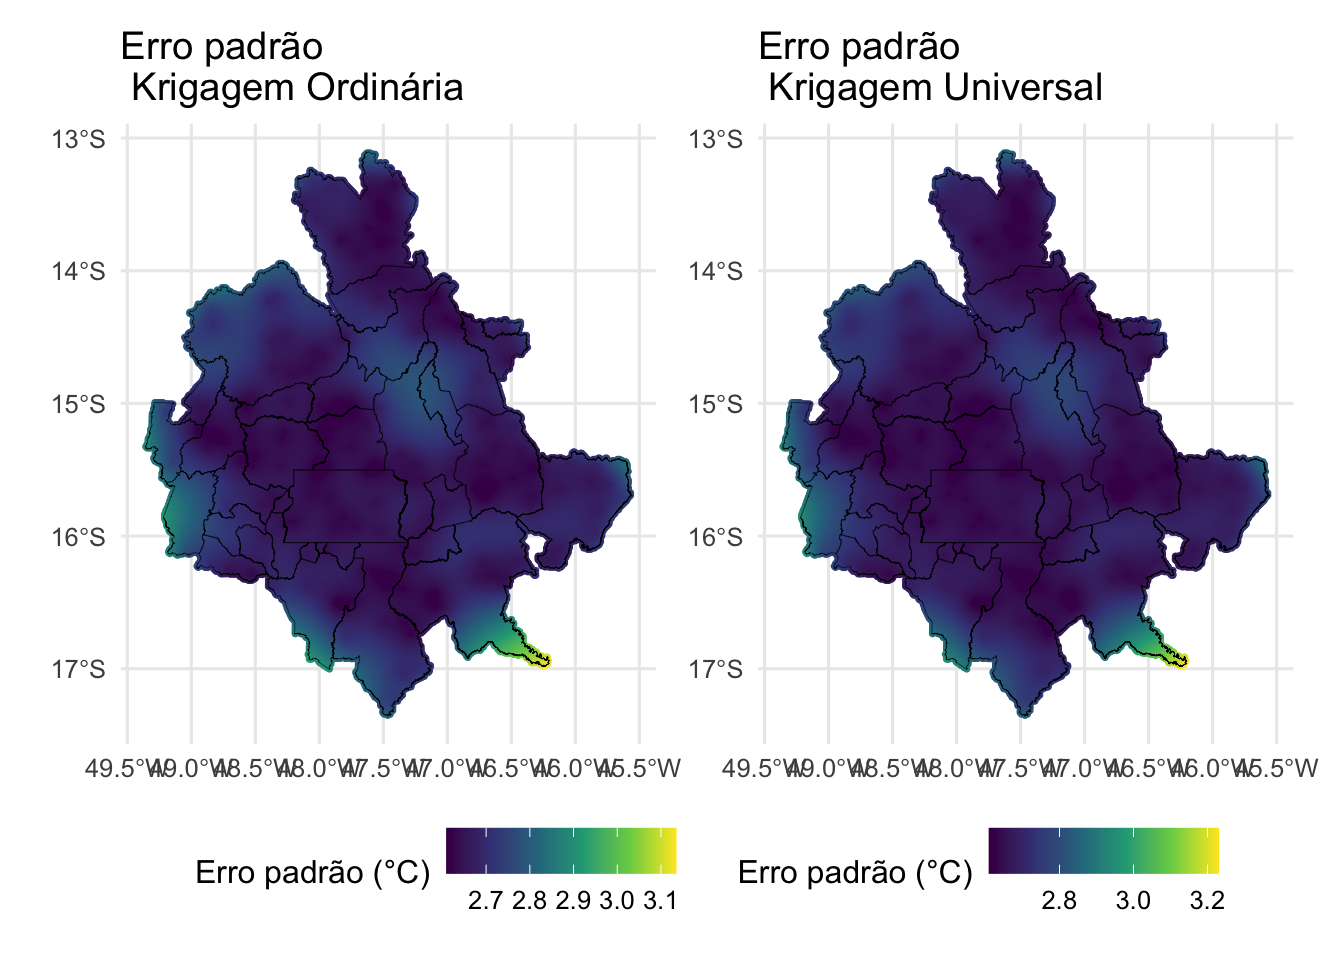

In [ ]:
# Erro padr√£o ordin√°rio
g1 <- ggplot() +
  geom_sf(data = kpred_latlon, aes(color = erro_padrao), size = 0.6) +
  geom_sf(data = ride_latlon, fill = NA, color = "black", linewidth = 0.1) +
  scale_color_viridis_c(name = "Erro padr√£o (¬∞C)") +
  theme_minimal(base_size=12) +
  labs(title = "Erro padr√£o\n Krigagem Ordin√°ria")

# Erro padr√£o universal
g2 <- ggplot() +
  geom_sf(data = kpred_uni_latlon, aes(color = erro_padrao), size = 0.6) +
  geom_sf(data = ride_latlon, fill = NA, color = "black", linewidth = 0.1) +
  scale_color_viridis_c(name = "Erro padr√£o (¬∞C)") +
  theme_minimal(base_size=12) +
  labs(title = "Erro padr√£o\n Krigagem Universal")

# Patchwork com legenda √∫nica
g1 + g2 + plot_layout(guides = "collect") & theme(legend.position = "bottom")

## Conclus√µes

A superf√≠cie de temperatura estimada pela krigagem revela padr√µes espaciais coerentes com as caracter√≠sticas geogr√°ficas e ambientais da Regi√£o Integrada de Desenvolvimento do Distrito Federal e Entorno (RIDE-DF). Observa-se uma tend√™ncia de temperaturas mais elevadas nas por√ß√µes norte e oeste da regi√£o, especialmente em munic√≠pios como Cavalcante, Alto Para√≠so de Goi√°s, Niquel√¢ndia e Barro Alto. Essas localidades s√£o marcadas por altitudes relativamente mais baixas, presen√ßa predominante de √°reas abertas, pastagens e agricultura extensiva, e menor cobertura florestal, fatores que favorecem maior absor√ß√£o de radia√ß√£o solar e aquecimento da superf√≠cie terrestre (Moraga, 2022). E eu tamb√©m por acaso j√° notei que Cavalcante costuma ser bem mais quente que Bras√≠lia quando vou la acambar no Parque Nacional da Chapada dos Veadeiros.

Em contraste, as temperaturas mais amenas concentram-se na por√ß√£o sul da RIDE, em munic√≠pios como Cristalina, Luzi√¢nia, Cidade Ocidental e Novo Gama, al√©m do centro-leste da regi√£o, abrangendo o Distrito Federal. Essa distribui√ß√£o se alinha √† topografia mais elevada do Planalto Central, onde altitudes frequentemente superam os 1.000 metros, contribuindo para uma modera√ß√£o t√©rmica natural. A maior presen√ßa de manchas urbanas cont√≠nuas com arboriza√ß√£o significativa, aliada a √°reas de prote√ß√£o ambiental como o Parque Nacional de Bras√≠lia, tamb√©m pode resultar em temperaturas de superf√≠cie mais baixas, configurando, em alguns trechos, o fen√¥meno conhecido como ‚Äúilha de frescor urbano‚Äù

Os dados utilizados referem-se √† temperatura da superf√≠cie terrestre (Land Surface Temperature ‚Äì LST) captada via sensoriamento remoto no per√≠odo diurno (~10h30), sendo sens√≠veis √† cobertura e ao uso do solo, √† umidade superficial e ao relevo. Como a data de refer√™ncia √© 22 de outubro de 2020, dia do anivers√°rio da autora, e tamb√©m um dos mais quentes daquele ano na regi√£o ‚Äî, a escolha do recorte temporal n√£o foi apenas afetiva, mas tamb√©m clim√°tica. Trata-se de um momento de transi√ß√£o entre a esta√ß√£o seca e o in√≠cio da esta√ß√£o chuvosa no Centro-Oeste, per√≠odo marcado por altos √≠ndices de radia√ß√£o solar e baixa umidade do solo.

Curiosamente, embora a mem√≥ria t√©rmica da autora guarde a Asa Norte como um forno reformando sem ar-condicionado, os dados mostram que havia regi√µes significativamente mais quentes na RIDE naquele dia. Assim, o sofrimento era real, mas n√£o estava sozinho: a superf√≠cie do Planalto queimava de forma coletiva

## Refer√™ncias